In [2]:
import os
from utils import config
import numpy as np
import matplotlib.pyplot as plt

In [4]:
folders = [
    "A3C_memory_curious-ICM_5-coins",
    "A3C_memory_curious-ICM_60-coins",
    "A3C_memory_curious-RF_5-coins",
    "A3C_memory_not-curious_5-coins",
    "A3C_memory_not-curious_60-coins",
    "A3C_simple_curious-ICM_5-coins",
    "A3C_simple_curious-ICM_60-coins",
    "A3C_simple_curious-pixel_5-coins",
    "A3C_simple_curious-pixel_60-coins",
    "A3C_simple_curious-RF_5-coins",
    "A3C_simple_curious-RF_60-coins",
    "A3C_simple_not-curious_5-coins",
    "A3C_simple_not-curious_60-coins",
    "A3C_simple_only-ICM_5-coins",
    "A3C_simple_only-ICM_60-coins"
]

average_over = 100
filepaths = list(map(lambda x: os.path.abspath(os.path.join(config().sim.output.path, x)), folders))

In [7]:
to_numpy = lambda x: x.item()

def load_folder(filepath):
    losses = np.load(filepath + f"/metrics__losses.npy")
    returns = np.array(list(map(to_numpy, np.load(filepath + f"/metrics__returns.npy"))))
    intrinsic_returns = list(map(to_numpy, np.load(filepath + f"/metrics__intrinsic_returns.npy")))
    extrinsic_returns = list(map(to_numpy, np.load(filepath + f"/metrics__extrinsic_returns.npy")))
    curiosity_score = np.load(filepath + f"/metrics__curiosity_score.npy")
    return returns, curiosity_score, losses, intrinsic_returns, extrinsic_returns

In [8]:
def moving_average(data, N=10):
    cumsum, moving_aves = [0], []
    std = []

    for i, x in enumerate(data, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
            std.append(np.std(data[i-N:i]))
    return np.array(moving_aves), np.array(std)
    

def plot(y, ylabel="", xlabel="", title="", path="", N=100, no_std=False):
    mean, std = moving_average(y, N)
    t = range(0, len(mean))
    plt.figure()
    plt.plot(t, mean)
    if not no_std:
        plt.fill_between(t, mean - std, mean + std, alpha=0.5, edgecolor='#608cd1', facecolor='#bed3f4')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(filepath + f"/{path}.eps", type="eps", dpi=1000)
    plt.show()
    
    
def plot_many(y_list, labels, ylabel="", xlabel="", title="", path="", N=100, no_std=False):
    plt.figure()
    for y, label in zip(y_list, labels):
        mean, std = moving_average(y, N)
        t = range(0, len(mean))
        plt.plot(t, mean, label=label)
        if not no_std:
            plt.fill_between(t, mean - std, mean + std, alpha=0.5, edgecolor='#608cd1', facecolor='#bed3f4')
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(filepath + f"/{path}.eps", type="eps", dpi=1000)
    plt.show()


In [11]:
for filepath in filepaths:
    returns, curiosity_score, losses, intrinsic_returns, extrinsic_returns = load_folder(filepath)
    mean, std = moving_average(curiosity_score, average_over)
    print("Curiosity:", round(mean[-1], 1), "+/-", std[-1])

Curiosity: 0.13869999999999905 +/- 0.03971536226701199
Curiosity: 0.18810000000000088 +/- 0.0820206681270032
Curiosity: 0.13100000000000037 +/- 0.04143669871020132
Curiosity: 0.1424000000000008 +/- 0.052955075299729294
Curiosity: 0.21989999999999982 +/- 0.09767799137983951
Curiosity: 0.2168999999999997 +/- 0.11051420723146865
Curiosity: 0.7093999999999983 +/- 0.16404158009480402
Curiosity: 0.20780000000000087 +/- 0.10868836184247142
Curiosity: 0.7042000000000002 +/- 0.15705527689320087
Curiosity: 0.24440000000000026 +/- 0.12087448035048588
Curiosity: 0.7374000000000013 +/- 0.14809199843340626
Curiosity: 0.1994999999999999 +/- 0.09858372076565176
Curiosity: 0.7351999999999999 +/- 0.14964945706550356
Curiosity: 0.13799999999999912 +/- 0.04634652090502587
Curiosity: 0.14009999999999878 +/- 0.04497766112193918


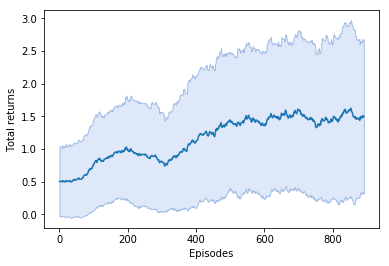

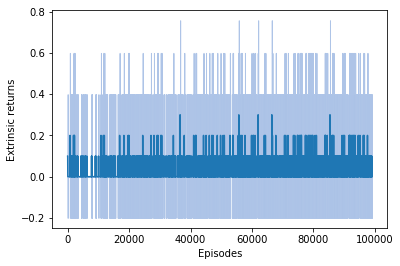

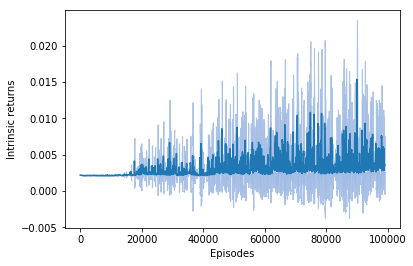

In [106]:
plot(returns, "Total returns", "Episodes", "", "total_returns")
plot(extrinsic_returns, "Extrinsic returns", "Episodes", "", "extrinsic_returns", N=10)
plot(intrinsic_returns, "Intrinsic returns", "Episodes", "", "intrinsic_returns")

In [85]:
print(losses.shape)

(991, 3)


In [102]:
if losses.shape[1] == 6:
    total_loss = losses[:, 0]
    loss_actor_critic = losses[:, 1]
    loss_value = losses[:, 2]
    loss_policy = losses[:, 3]
    loss_forward = losses[:, 4]
    loss_inverse = losses[:, 5]
    loss_array = [total_loss, loss_actor_critic,  loss_value, loss_policy, loss_forward, loss_inverse]
    legend_array = ["Sum", "Actor-Critic", "Value function", "Policy", "Forward model", "Inverse model"]
else:
    total_loss = losses[:, 0]
    loss_value = losses[:, 1]
    loss_policy = losses[:, 2]
    loss_array = [total_loss,  loss_value, loss_policy]
    legend_array = ["Sum", "Value function", "Policy"]


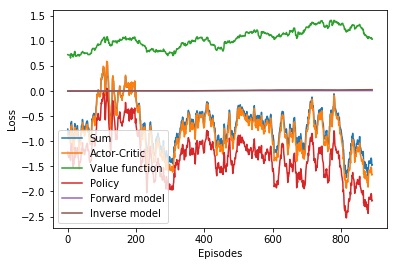

In [103]:
plot_many(loss_array, legend_array , "Loss", "Episodes", "", "all_losses", no_std=True)

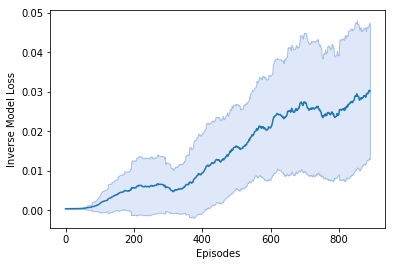

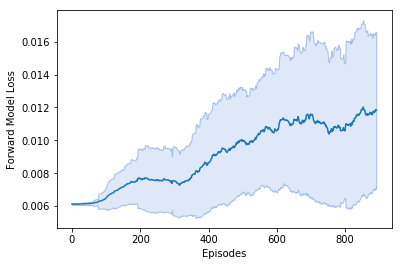

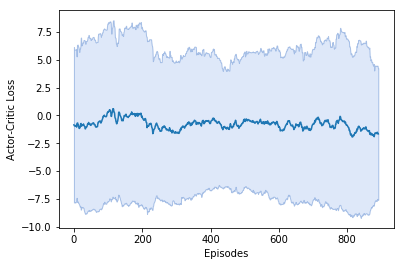

In [104]:
plot(loss_inverse , "Inverse Model Loss", "Episodes", "", "inverse_model_loss")
plot(loss_forward , "Forward Model Loss", "Episodes", "", "forward_model_loss")
plot(loss_actor_critic , "Actor-Critic Loss", "Episodes", "", "actor_critic_loss")